# Assignment 3- Malware detection and classifiction

# Abhinav Malik (MDS202401)

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('netflow.csv')
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign


In [ ]:
df.isnull().sum()

IPV4_SRC_ADDR                 0
L4_SRC_PORT                   0
IPV4_DST_ADDR                 0
L4_DST_PORT                   0
PROTOCOL                      0
L7_PROTO                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
TCP_FLAGS                     0
FLOW_DURATION_MILLISECONDS    0
Label                         0
Attack                        0
dtype: int64

In [ ]:
df.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack'],
      dtype='object')

### Column Description
* `IPV4_SRC_ADDR`: Source IPv4 address from which the network flow originated.
* `L4_SRC_PORT`: Source port number associated with the transport layer (Layer 4) protocol.
* `IPV4_DST_ADDR`: Destination IPv4 address to which the network flow is directed.
* `L4_DST_PORT`: Destination port number used by the transport layer protocol (e.g., TCP/UDP).
* `PROTOCOL`: Network protocol number used for communication (e.g., 6 for TCP, 17 for UDP).
* `L7_PROTO`: Application layer (Layer 7) protocol identifier; represents the detected application protocol type.
* `IN_BYTES`: Total number of bytes received in the inbound direction for the flow.
* `OUT_BYTES`: Total number of bytes sent in the outbound direction for the flow.
* `IN_PKTS`: Number of packets received in the inbound direction.
* `OUT_PKTS`: Number of packets transmitted in the outbound direction.
* `TCP_FLAGS`: TCP control flags observed in the flow (e.g., SYN, ACK, FIN).
* `FLOW_DURATION_MILLISECONDS`: Total duration of the network flow measured in milliseconds.

#####  `Label`: Binary indicator where `0` represents *Benign* (normal traffic) and `1` represents *Attack* (malicious traffic).

#####  `Attack`: Categorical class label specifying the exact type of traffic — e.g., *Benign* for normal activity or a specific *Attack Type* for malicious flows.


### About the Target Variable

The dataset contains **two related target fields** — `Label` and `Attack`.

* **`Label`** serves as the **binary classification target**, distinguishing between *Benign (0)* and *Attack (1)* network flows.
* **`Attack`** provides **multi-class or categorical context**, indicating the specific attack category when applicable.

`Label` simplifies the prediction task to “normal vs malicious,” while `Attack` allows finer-grained classification into individual attack types, making this dataset suitable for both **binary and multi-class intrusion detection** tasks.

In [ ]:
df[df['Label']==1]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
29,175.45.176.1,43025,149.171.126.16,25,6,3.0,41290,2080,48,24,27,803,1,Exploits
40,175.45.176.3,64923,149.171.126.17,80,6,7.0,994,256,10,6,19,189,1,Exploits
67,175.45.176.3,9022,149.171.126.13,111,6,11.0,552,336,10,8,19,678,1,Reconnaissance
93,175.45.176.3,1752,149.171.126.10,25,6,3.0,3022,1636,20,20,19,789,1,DoS
115,175.45.176.3,53967,149.171.126.14,111,17,11.0,168,0,2,0,0,0,1,Reconnaissance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122105,175.45.176.0,34938,149.171.126.12,143,6,4.0,1024,5804,18,20,27,770,1,Exploits
1122135,175.45.176.2,6149,149.171.126.14,25,6,3.0,155094,2400,136,36,27,1357,1,Exploits
1122157,175.45.176.0,19029,149.171.126.12,80,6,7.0,1106,256,10,6,19,162,1,Exploits
1122181,175.45.176.0,35540,149.171.126.18,143,6,4.0,1168,41024,22,46,27,773,1,Exploits


In [ ]:
df["Attack"].unique()

array(['Benign', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', 'Backdoor', 'Fuzzers', 'Worms', 'Analysis'],
      dtype=object)

## EDA and Plotting the data

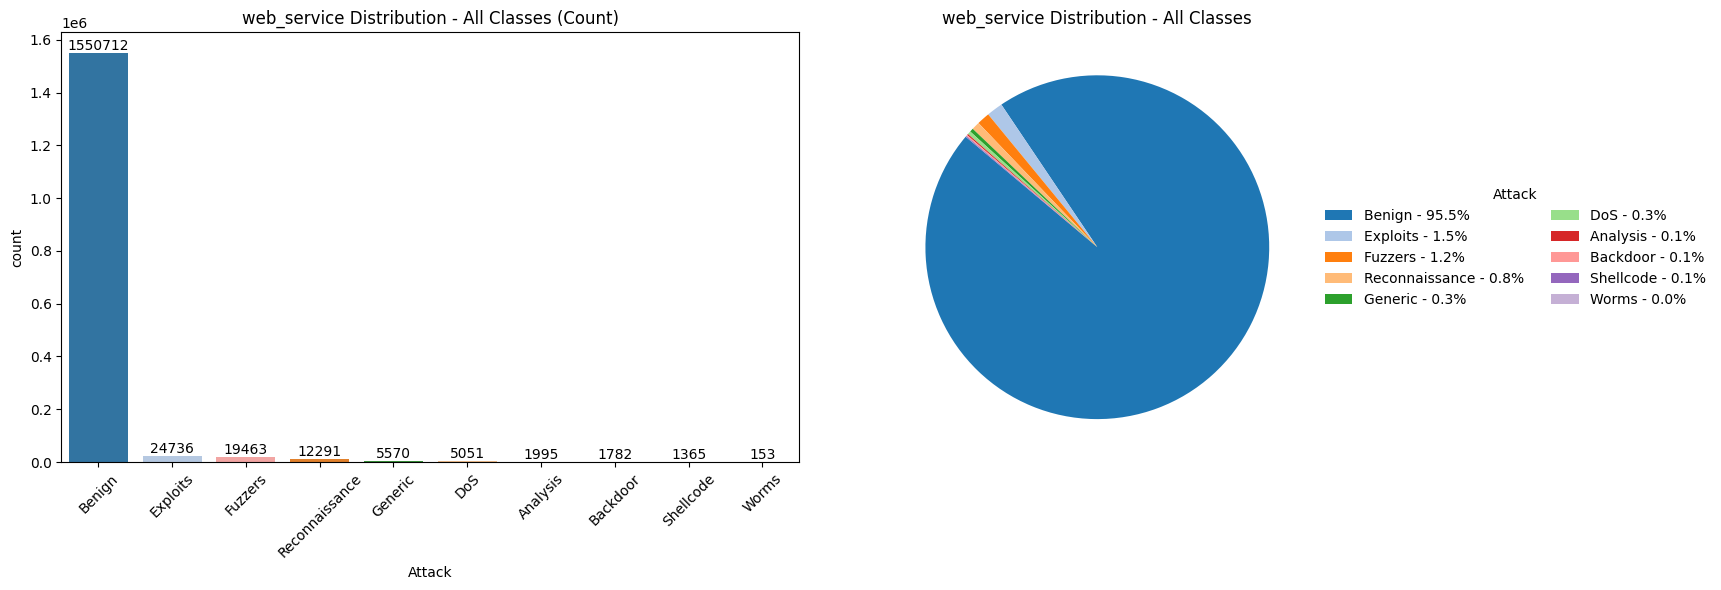

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Compute counts
category_counts = df["Attack"].value_counts()
top_labels = category_counts.index  # all 10 classes

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar plot (all classes)
sns.countplot(
    data=df[df["Attack"].isin(top_labels)],
    x="Attack",
    hue="Attack",
    order=top_labels,
    palette="tab20",
    legend=False,
    ax=axes[0]
)

axes[0].set_title("web_service Distribution - All Classes (Count)")
axes[0].tick_params(axis='x', rotation=45)

# Add counts above each bar
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Pie chart (all classes)
colors = sns.color_palette("tab20", len(category_counts))
wedges, _ = axes[1].pie(
    category_counts,
    startangle=140,
    colors=colors
)
axes[1].set_title("web_service Distribution - All Classes")

total = category_counts.sum()
legend_labels = [
    f"{cat} - {count/total:.1%}" for cat, count in category_counts.items()
]

axes[1].legend(
    wedges,
    legend_labels,
    title="Attack",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.show()

In [ ]:
print("\nDistribution of Attack Types")
print(df['Attack'].value_counts())


Distribution of Attack Types
Attack
Benign            1550712
Exploits            24736
Fuzzers             19463
Reconnaissance      12291
Generic              5570
DoS                  5051
Analysis             1995
Backdoor             1782
Shellcode            1365
Worms                 153
Name: count, dtype: int64


In [ ]:
# Filter out Benign flows
attack_only = df[df['Attack'] != 'Benign']

# Analyze the 'Attack' column (excluding Benign)
print("\nDistribution of Attack Types (excluding Benign)")
print(attack_only['Attack'].value_counts())


Distribution of Attack Types (excluding Benign)
Attack
Exploits          24736
Fuzzers           19463
Reconnaissance    12291
Generic            5570
DoS                5051
Analysis           1995
Backdoor           1782
Shellcode          1365
Worms               153
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
# --- Encode categorical columns ---
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le

# --- Compute correlation matrix ---
corr = df_encoded.corr()

# --- Plot interactive correlation heatmap ---
fig = go.Figure(
    data=go.Heatmap(
        z=corr.values,
        x=corr.columns,
        y=corr.columns,
        colorscale="Viridis",
        zmin=-1,
        zmax=1,
        colorbar=dict(title="Correlation"),
        hovertemplate=(
            "Feature 1: %{x}<br>"
            "Feature 2: %{y}<br>"
            "Correlation: %{z:.3f}<extra></extra>"
        )
    )
)

fig.update_layout(
    title="Interactive Correlation Heatmap — Network Traffic & Malware Detection Dataset",
    width=1100,
    height=600,
    xaxis=dict(tickangle=45),
    template="plotly_white",
    paper_bgcolor="white",
    plot_bgcolor="white"
)

fig.show()

In [ ]:
# Summary Statistics for Numerical Columns
print("\nSummary Statistics")
# Using .T to transpose the output to make it easier to read
df.describe().T


Summary Statistics


,count,mean,std,min,25%,50%,75%,max
L4_SRC_PORT,1623118.0,32641.495958,19197.833082,0.0,15916.0,32675.0,49348.0,65535.0
L4_DST_PORT,1623118.0,13819.548513,19593.696089,0.0,53.0,2627.0,24559.0,65535.0
PROTOCOL,1623118.0,9.890804,12.523210,0.0,6.0,6.0,17.0,255.0
L7_PROTO,1623118.0,13.655814,20.620798,0.0,0.0,5.0,13.0,249.0
IN_BYTES,1623118.0,5336.064379,78411.188944,52.0,520.0,1920.0,3806.0,26854254.0
OUT_BYTES,1623118.0,42731.287964,175420.533944,0.0,304.0,3276.0,21006.0,14656752.0
IN_PKTS,1623118.0,39.539013,88.836277,1.0,4.0,16.0,50.0,20038.0
OUT_PKTS,1623118.0,50.786613,131.508202,0.0,4.0,18.0,48.0,11024.0
TCP_FLAGS,1623118.0,19.066694,12.065883,0.0,0.0,27.0,27.0,31.0
FLOW_DURATION_MILLISECONDS,1623118.0,55151.605148,481163.415318,0.0,0.0,7.0,166.0,4294952.0


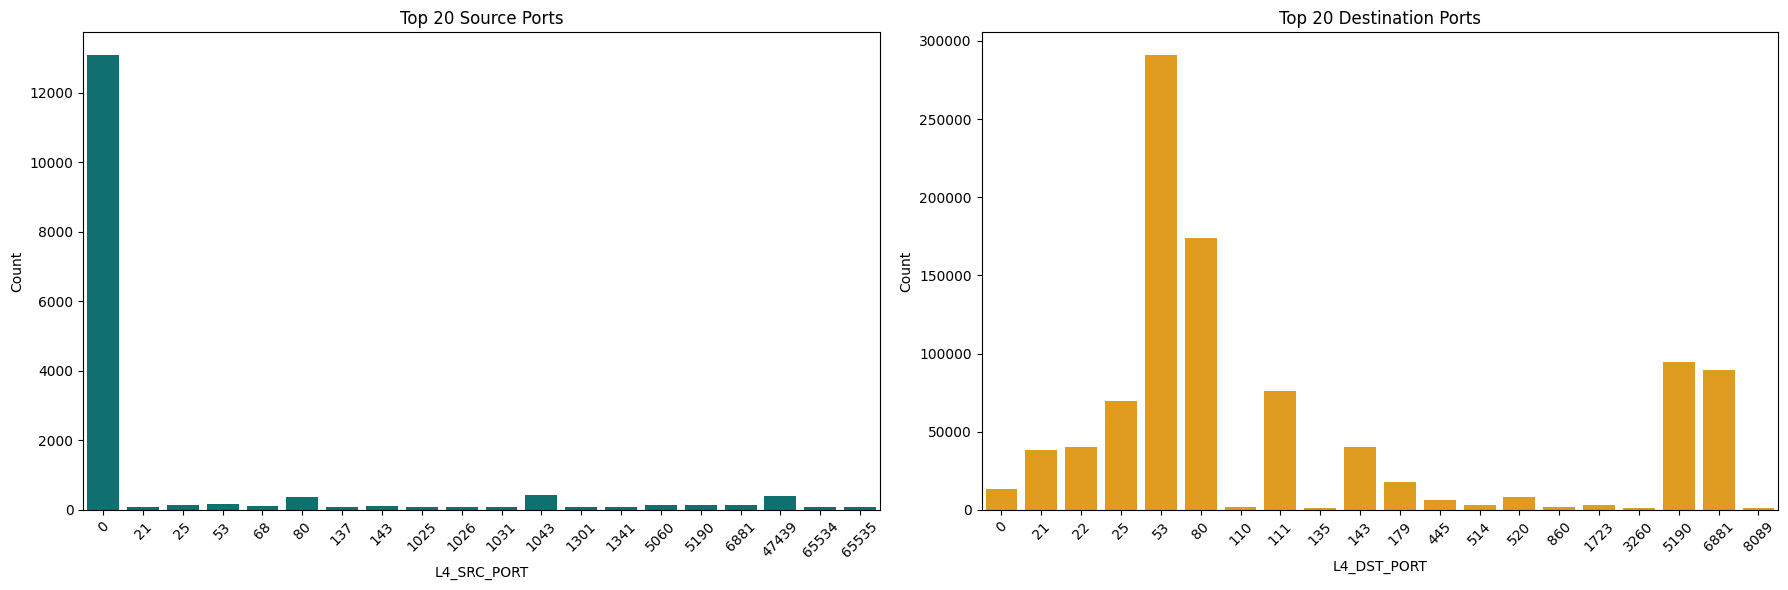

In [ ]:
# Top 20 ports
top_src_ports = df['L4_SRC_PORT'].value_counts().head(20)
top_dst_ports = df['L4_DST_PORT'].value_counts().head(20)

fig, axes = plt.subplots(1, 2, figsize=(18,6))

# Source Ports Bar + KDE
sns.barplot(x=top_src_ports.index, y=top_src_ports.values, color='teal', ax=axes[0])
axes[0].set_title("Top 20 Source Ports")
axes[0].set_xlabel("L4_SRC_PORT")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Destination Ports Bar + KDE
sns.barplot(x=top_dst_ports.index, y=top_dst_ports.values, color='orange', ax=axes[1])
axes[1].set_title("Top 20 Destination Ports")
axes[1].set_xlabel("L4_DST_PORT")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

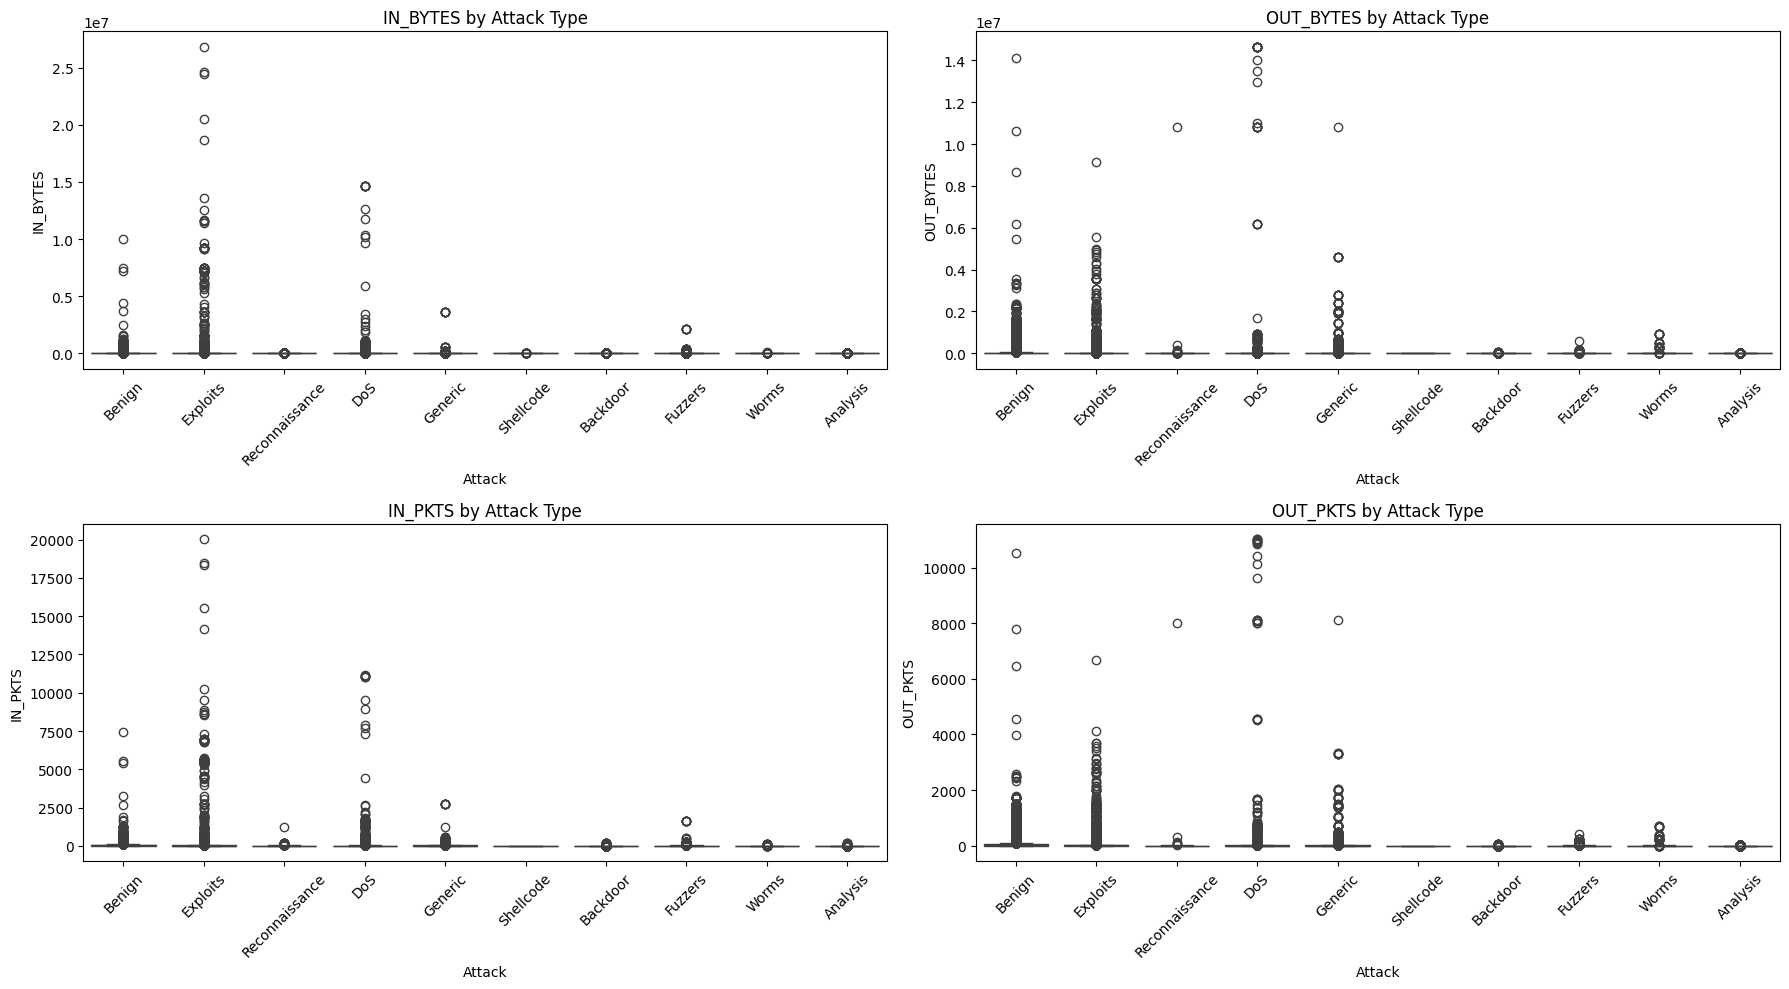

In [ ]:
numeric_features = ['IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS']

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.boxplot(x='Attack', y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} by Attack Type")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

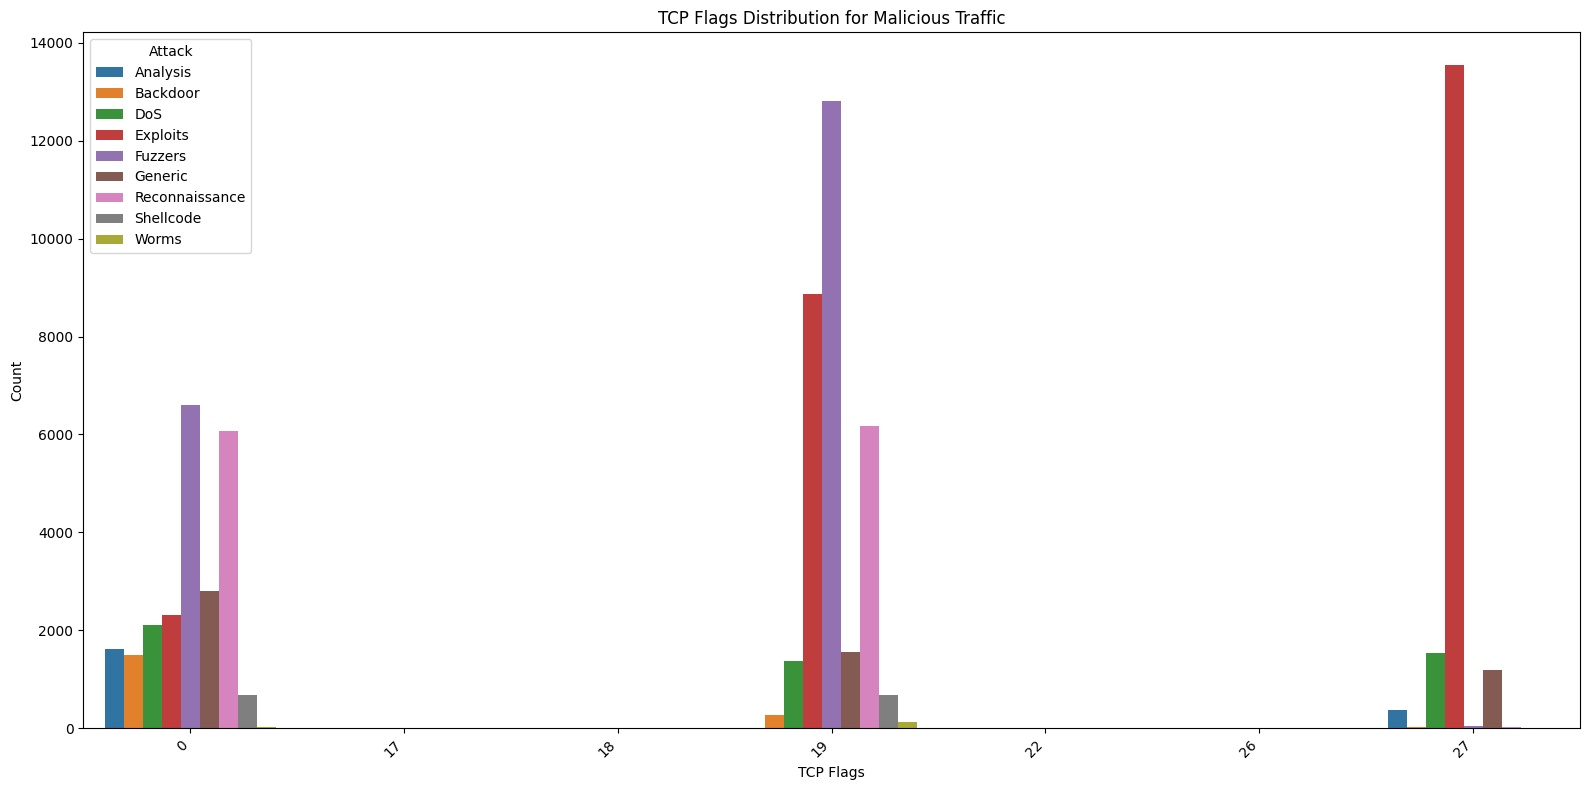

In [ ]:
df_attack_only = df[df['Attack'] != 'Benign']
plt.figure(figsize=(16, 8))
# Only consider flows that are not Benign to see flag usage in attacks
tcp_flags_counts = df_attack_only.groupby(['TCP_FLAGS', 'Attack']).size().reset_index(name='Count')
# Filter out flag values that are too rare to visualize clearly
top_flags = df['TCP_FLAGS'].value_counts().head(10).index
tcp_flags_counts_filtered = tcp_flags_counts[tcp_flags_counts['TCP_FLAGS'].isin(top_flags)]

sns.barplot(x='TCP_FLAGS', y='Count', hue='Attack', data=tcp_flags_counts_filtered)
plt.title('TCP Flags Distribution for Malicious Traffic')
plt.xlabel('TCP Flags')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Creating new statistical features for flows

In [ ]:
df_feat = df.copy()

# Add a small constant to avoid dividing by zero in later calculations
epsilon = 1e-6

# Create rate-based features
# Convert duration from milliseconds to seconds for more meaningful rates
duration_sec = df_feat['FLOW_DURATION_MILLISECONDS'] / 1000
df_feat['in_bytes_per_sec'] = df_feat['IN_BYTES'] / (duration_sec + epsilon)
df_feat['out_bytes_per_sec'] = df_feat['OUT_BYTES'] / (duration_sec + epsilon)
df_feat['in_pkts_per_sec'] = df_feat['IN_PKTS'] / (duration_sec + epsilon)
df_feat['out_pkts_per_sec'] = df_feat['OUT_PKTS'] / (duration_sec + epsilon)

# Create average packet size features
df_feat['avg_in_pkt_size'] = df_feat['IN_BYTES'] / (df_feat['IN_PKTS'] + epsilon)
df_feat['avg_out_pkt_size'] = df_feat['OUT_BYTES'] / (df_feat['OUT_PKTS'] + epsilon)

# Create ratio-based features
df_feat['in_out_byte_ratio'] = df_feat['IN_BYTES'] / (df_feat['OUT_BYTES'] + epsilon)
df_feat['in_out_pkt_ratio'] = df_feat['IN_PKTS'] / (df_feat['OUT_PKTS'] + epsilon)

# Show a quick preview of the new features
print("New features are added")
new_feature_names = [
    'in_bytes_per_sec', 'out_bytes_per_sec', 'in_pkts_per_sec', 'out_pkts_per_sec',
    'avg_in_pkt_size', 'avg_out_pkt_size', 'in_out_byte_ratio', 'in_out_pkt_ratio'
]
print(df_feat[['IN_BYTES', 'OUT_BYTES', 'FLOW_DURATION_MILLISECONDS'] + new_feature_names].head())

# Display basic statistics for the new features
print("\nSummary Statistics for New Features")
df_feat[new_feature_names].describe().T

New features are added
   IN_BYTES  OUT_BYTES  FLOW_DURATION_MILLISECONDS  in_bytes_per_sec  \
0      9672        416                          15      6.447570e+05   
1      1776        104                           0      1.776000e+09   
2      1842       1236                        1111      1.657964e+03   
3       528       8824                         124      4.258030e+03   
4      1786       2340                        1459      1.224125e+03   

   out_bytes_per_sec  in_pkts_per_sec  out_pkts_per_sec  avg_in_pkt_size  \
0       2.773148e+04     7.332844e+02      5.332978e+02       879.272647   
1       1.040000e+08     6.000000e+06      2.000000e+06       295.999951   
2       1.112510e+03     2.340232e+01      1.980196e+01        70.846151   
3       7.116072e+04     8.064451e+01      9.677341e+01        52.799995   
4       1.603837e+03     2.193282e+01      2.330362e+01        55.812498   

   avg_out_pkt_size  in_out_byte_ratio  in_out_pkt_ratio  
0         51.999994         

,count,mean,std,min,25%,50%,75%,max
in_bytes_per_sec,1623118.0,1.089978e+09,5.437241e+09,0.030268,26139.644411,145854.145854,1.460000e+08,1.087674e+12
out_bytes_per_sec,1623118.0,6.943228e+09,5.414554e+10,0.000000,32322.225926,402664.501804,1.780000e+08,1.641360e+12
in_pkts_per_sec,1623118.0,8.771983e+06,2.760912e+07,0.000233,164.919954,1998.001998,2.000000e+06,7.420000e+08
out_pkts_per_sec,1623118.0,1.017614e+07,4.357395e+07,0.000000,137.194832,1998.001998,2.000000e+06,1.278000e+09
avg_in_pkt_size,1623118.0,1.318874e+02,1.687122e+02,27.999986,61.958332,72.999964,1.280000e+02,1.507998e+03
avg_out_pkt_size,1623118.0,3.353867e+02,3.393382e+02,0.000000,80.999960,120.539682,5.648889e+02,1.500000e+03
in_out_byte_ratio,1623118.0,1.830579e+07,4.553072e+08,0.001974,0.109936,0.784492,1.266990e+00,6.018400e+10
in_out_pkt_ratio,1623118.0,1.277804e+05,3.365784e+06,0.002500,0.941176,0.976744,9.999998e-01,9.280000e+08


In [ ]:
df_feat.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,...,Label,Attack,in_bytes_per_sec,out_bytes_per_sec,in_pkts_per_sec,out_pkts_per_sec,avg_in_pkt_size,avg_out_pkt_size,in_out_byte_ratio,in_out_pkt_ratio
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,...,0,Benign,6.447570e+05,2.773148e+04,7.332844e+02,5.332978e+02,879.272647,51.999994,23.250000,1.375000
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,...,0,Benign,1.776000e+09,1.040000e+08,6.000000e+06,2.000000e+06,295.999951,51.999974,17.076923,2.999999
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,...,0,Benign,1.657964e+03,1.112510e+03,2.340232e+01,1.980196e+01,70.846151,56.181816,1.490291,1.181818
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,...,0,Benign,4.258030e+03,7.116072e+04,8.064451e+01,9.677341e+01,52.799995,735.333272,0.059837,0.833333
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,...,0,Benign,1.224125e+03,1.603837e+03,2.193282e+01,2.330362e+01,55.812498,68.823527,0.763248,0.941176


## Data preprocessing and Model preparation

In [ ]:
label_percent = df['Label'].value_counts(normalize=True) * 100
print("\nPercentage:\n", label_percent.round(2))

# Percentage calculation
label_counts = df['Attack'].value_counts()
label_percent = df['Attack'].value_counts(normalize=True) * 100
print("\nPercentage:\n", label_percent.round(2))


Percentage:
 Label
0    95.54
1     4.46
Name: proportion, dtype: float64

Percentage:
 Attack
Benign            95.54
Exploits           1.52
Fuzzers            1.20
Reconnaissance     0.76
Generic            0.34
DoS                0.31
Analysis           0.12
Backdoor           0.11
Shellcode          0.08
Worms              0.01
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Define features (X) and binary target (y)
y_binary = df_feat['Label']
X_binary = df_feat.drop(columns=['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'])

# Split data (stratified)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

# Scale features
scaler_bin = StandardScaler()
X_train_bin_scaled = scaler_bin.fit_transform(X_train_bin)
X_test_bin_scaled = scaler_bin.transform(X_test_bin)

# Apply SMOTE to the training data
print("Applying SMOTE for Binary Classification")
smote_bin = SMOTE(random_state=42)
X_train_bin_resampled, y_train_bin_resampled = smote_bin.fit_resample(X_train_bin_scaled, y_train_bin)
print(f"Shape after SMOTE: {X_train_bin_resampled.shape}")

Applying SMOTE for Binary Classification
Shape after SMOTE: (2170996, 18)


### Binary Classification Random Forest

Training Binary Random Forest Classifier

Binary Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.99      0.99    465214
      Attack       0.78      0.95      0.86     21722

    accuracy                           0.99    486936
   macro avg       0.89      0.97      0.93    486936
weighted avg       0.99      0.99      0.99    486936



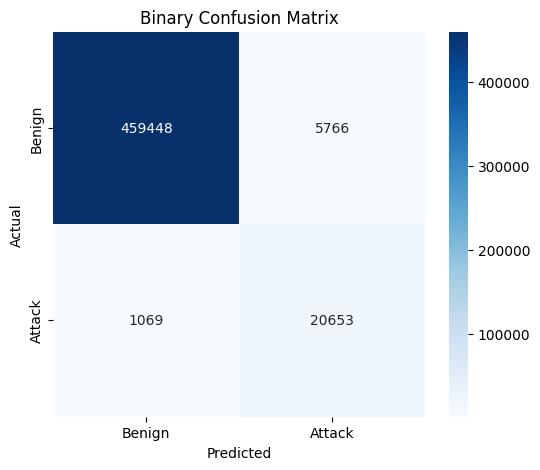

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train and evaluate Random Forest
print("Training Binary Random Forest Classifier")
rf_binary = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_binary.fit(X_train_bin_resampled, y_train_bin_resampled)

y_pred_bin = rf_binary.predict(X_test_bin_scaled)

print("\nBinary Classification Report:")
print(classification_report(y_test_bin, y_pred_bin, target_names=['Benign', 'Attack']))

cm_bin = confusion_matrix(y_test_bin, y_pred_bin)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_bin, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Attack'],
            yticklabels=['Benign', 'Attack'])
plt.title('Binary Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Multi-Class Classification Random Forest

In [ ]:
# Define features (X) and multi-class target (y)
y_multi = df_feat['Attack']
X_multi = df_feat.drop(columns=['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'])

# Encode text labels into numbers
label_encoder = LabelEncoder()
y_multi_encoded = label_encoder.fit_transform(y_multi)

# Split data (stratified)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi_encoded, test_size=0.3, random_state=42, stratify=y_multi_encoded
)

# Scale features
scaler_multi = StandardScaler()
X_train_multi_scaled = scaler_multi.fit_transform(X_train_multi)
X_test_multi_scaled = scaler_multi.transform(X_test_multi)

# Apply SMOTE to only minority classes in training data
print("Applying SMOTE for Multi-Class Classification (oversampling only attacks)")
# This strategy resamples all classes but the majority class ('Benign')
smote_multi = SMOTE(sampling_strategy='not majority', random_state=42)

print("\nClass distribution before SMOTE:")
print(pd.Series(y_train_multi).value_counts())

X_train_multi_resampled, y_train_multi_resampled = smote_multi.fit_resample(X_train_multi_scaled, y_train_multi)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_multi_resampled).value_counts())

Applying SMOTE for Multi-Class Classification (oversampling only attacks)

Class distribution before SMOTE:
2    1085498
4      17315
5      13624
7       8604
6       3899
3       3536
0       1396
1       1247
8        956
9        107
Name: count, dtype: int64

Class distribution after SMOTE:
2    1085498
4    1085498
5    1085498
7    1085498
6    1085498
3    1085498
1    1085498
9    1085498
0    1085498
8    1085498
Name: count, dtype: int64


Training Multi-Class Random Forest Classifier

Multi-Class Classification Report:
                precision    recall  f1-score   support

      Analysis       0.09      0.31      0.14       599
      Backdoor       0.10      0.27      0.14       535
        Benign       1.00      0.99      0.99    465214
           DoS       0.39      0.36      0.38      1515
      Exploits       0.79      0.82      0.81      7421
       Fuzzers       0.46      0.77      0.58      5839
       Generic       0.76      0.59      0.66      1671
Reconnaissance       0.86      0.78      0.82      3687
     Shellcode       0.85      0.93      0.89       409
         Worms       0.56      0.63      0.59        46

      accuracy                           0.97    486936
     macro avg       0.59      0.65      0.60    486936
  weighted avg       0.98      0.97      0.98    486936



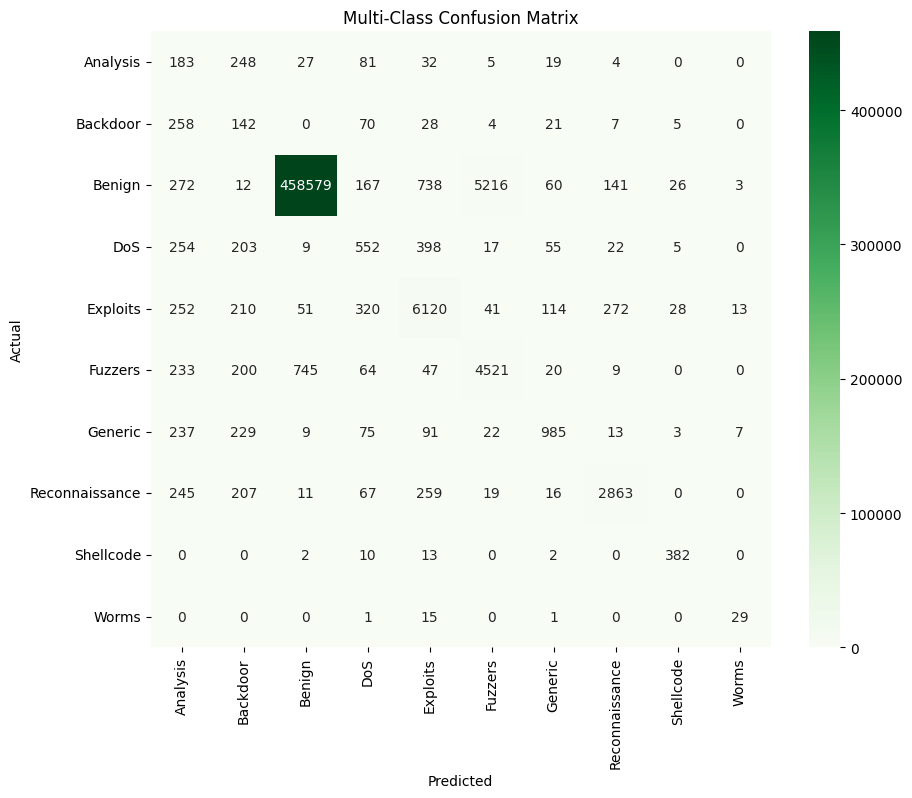

In [ ]:
# Train and evaluate Random Forest
print("Training Multi-Class Random Forest Classifier")
rf_multi = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_multi.fit(X_train_multi_resampled, y_train_multi_resampled)

y_pred_multi = rf_multi.predict(X_test_multi_scaled)

print("\nMulti-Class Classification Report:")
# Use the label_encoder to show the original class names
print(classification_report(y_test_multi, y_pred_multi, target_names=label_encoder.classes_))

cm_multi = confusion_matrix(y_test_multi, y_pred_multi)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Multi-Class Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Multi-Class Classification Xgboost

In [ ]:
import xgboost as xgb
# Initialize and train the XGBoost model
print("Training Multi-Class XGBoost Classifier")

# For XGBoost, it's good practice to set the objective and eval_metric for multi-class tasks
# We also tell it how many classes to expect
xgb_multi = xgb.XGBClassifier(
    objective='multi:softmax',      # Specifies a multi-class classification task
    num_class=len(label_encoder.classes_), # Sets the number of target classes
    eval_metric='mlogloss',         # Logarithmic loss for evaluation
    use_label_encoder=False,        # Recommended setting to avoid deprecation warnings
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

xgb_multi.fit(X_train_multi_resampled, y_train_multi_resampled)
print("Model training complete.")

# Make predictions
y_pred_xgb = xgb_multi.predict(X_test_multi_scaled)

Training Multi-Class XGBoost Classifier


c:\Users\SHRUTI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning:

[22:14:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Model training complete.



XGBoost Multi-Class Classification Report:
                precision    recall  f1-score   support

      Analysis       0.12      0.60      0.21       599
      Backdoor       0.13      0.35      0.19       535
        Benign       1.00      0.98      0.99    465214
           DoS       0.40      0.39      0.39      1515
      Exploits       0.83      0.74      0.79      7421
       Fuzzers       0.41      0.90      0.56      5839
       Generic       0.71      0.60      0.65      1671
Reconnaissance       0.84      0.82      0.83      3687
     Shellcode       0.78      0.96      0.86       409
         Worms       0.29      0.83      0.43        46

      accuracy                           0.97    486936
     macro avg       0.55      0.72      0.59    486936
  weighted avg       0.98      0.97      0.98    486936


XGBoost Confusion Matrix:


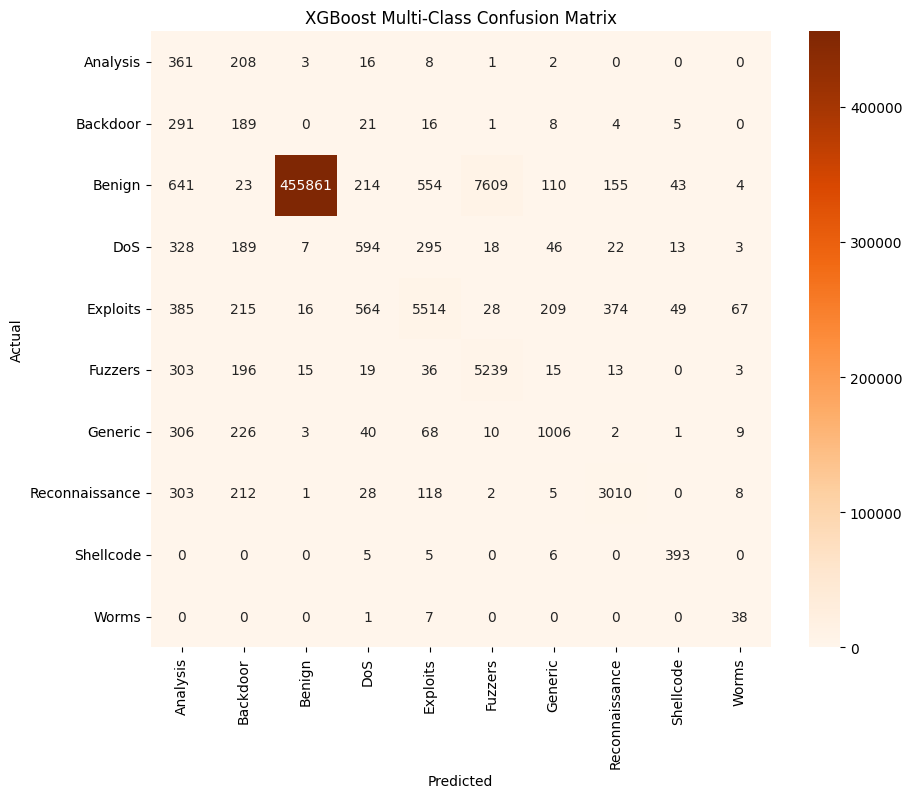

In [ ]:
# Evaluate the model
print("\nXGBoost Multi-Class Classification Report:")
# Use the same label_encoder to get the original class names
print(classification_report(y_test_multi, y_pred_xgb, target_names=label_encoder.classes_))

print("\nXGBoost Confusion Matrix:")
cm_xgb = confusion_matrix(y_test_multi, y_pred_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('XGBoost Multi-Class Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Binary KNN Classifier

Training Binary KNN Classifier
Model training complete.

KNN Binary Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.98      0.99    465214
      Attack       0.73      0.97      0.83     21722

    accuracy                           0.98    486936
   macro avg       0.86      0.98      0.91    486936
weighted avg       0.99      0.98      0.98    486936


KNN Binary Confusion Matrix:


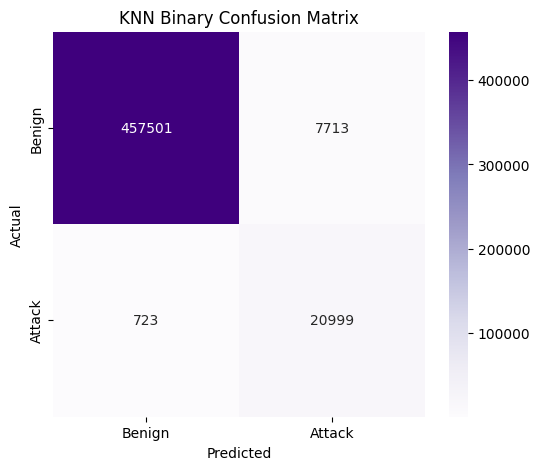

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
print("Training Binary KNN Classifier")
# n_neighbors=5 is a common starting point. n_jobs=-1 uses all CPU cores.
knn_binary = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

knn_binary.fit(X_train_bin_resampled, y_train_bin_resampled)
print("Model training complete.")

# Make predictions
y_pred_knn_bin = knn_binary.predict(X_test_bin_scaled)

# Evaluate the model
print("\nKNN Binary Classification Report:")
print(classification_report(y_test_bin, y_pred_knn_bin, target_names=['Benign', 'Attack']))

print("\nKNN Binary Confusion Matrix:")
cm_knn_bin = confusion_matrix(y_test_bin, y_pred_knn_bin)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn_bin, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Benign', 'Attack'],
            yticklabels=['Benign', 'Attack'])
plt.title('KNN Binary Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Using protocol to determine anomalies

In [ ]:
y = df_feat['Attack']

# Select features (do not modify df_feat)
X = df_feat.drop(columns=['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'])

print(f"Features selected for training: {X.shape[1]}")
print(list(X.columns))

# Adding protocol-level mean/std features
print("\nAdding protocol-level mean/std features...")

# Create a copy to avoid touching original X
X_enhanced = X.copy()

# Identify numeric columns (excluding identifiers)
numeric_cols = X_enhanced.select_dtypes(include='number').columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['L7_PROTO', 'PROTOCOL']]

# Compute group-level mean and std based on L7_PROTO
proto_means = X_enhanced.groupby('L7_PROTO')[numeric_cols].transform('mean')
proto_stds = X_enhanced.groupby('L7_PROTO')[numeric_cols].transform('std')

# Rename columns to show they’re derived
proto_means.columns = [f"{col}_proto_mean" for col in proto_means.columns]
proto_stds.columns = [f"{col}_proto_std" for col in proto_stds.columns]

# Concatenate
X_enhanced = pd.concat([X_enhanced, proto_means, proto_stds], axis=1)

print(f"Added {proto_means.shape[1] + proto_stds.shape[1]} new protocol-level features.")
print(f"Total features now: {X_enhanced.shape[1]}")

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_enhanced, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData (with enhanced features) ready for modeling!")

Features selected for training: 18
['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'in_bytes_per_sec', 'out_bytes_per_sec', 'in_pkts_per_sec', 'out_pkts_per_sec', 'avg_in_pkt_size', 'avg_out_pkt_size', 'in_out_byte_ratio', 'in_out_pkt_ratio']

Adding protocol-level mean/std features...
Added 32 new protocol-level features.
Total features now: 50

Training set shape: (1136182, 50)
Testing set shape: (486936, 50)

Data (with enhanced features) ready for modeling!


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight

# Calculate sample weights to handle imbalance
# This is the multi-class equivalent of 'class_weight=balanced' for XGBoost.
# It creates a weight for each training sample, giving higher weights to
# samples from rarer classes.
print("Calculating sample weights for the imbalanced dataset...")
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train
)
print("Weight calculation complete.")

# Initialize and train the XGBoost model
print("\nTraining the XGBoost model...")
# We use the calculated weights during the training process
model_xgb = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_jobs=-1
)
model_xgb.fit(X_train_scaled, y_train, sample_weight=sample_weights)
print("Model training complete.")

# Make predictions on the test data
y_pred = model_xgb.predict(X_test_scaled)

# Evaluate the model's performance
# For the reports, it's more readable to use the original string labels
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Print the classification report
print("\nXGBoost Classification Report")
print(classification_report(y_test_labels, y_pred_labels))

Calculating sample weights for the imbalanced dataset...
Weight calculation complete.

Training the XGBoost model...


c:\Users\SHRUTI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning:

[23:34:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Model training complete.

XGBoost Classification Report
                precision    recall  f1-score   support

      Analysis       0.12      0.60      0.20       599
      Backdoor       0.11      0.30      0.16       535
        Benign       1.00      0.98      0.99    465214
           DoS       0.42      0.43      0.42      1515
      Exploits       0.84      0.76      0.80      7421
       Fuzzers       0.40      0.90      0.56      5839
       Generic       0.77      0.61      0.68      1671
Reconnaissance       0.84      0.82      0.83      3687
     Shellcode       0.80      0.98      0.88       409
         Worms       0.56      0.80      0.66        46

      accuracy                           0.97    486936
     macro avg       0.59      0.72      0.62    486936
  weighted avg       0.98      0.97      0.98    486936



## 1. Dataset Overview

The dataset used for this analysis consists of network flow records designed for traffic classification and malware detection.

The data includes two target variables:
* **`Label`**: A binary target where `0` represents 'Benign' traffic and `1` represents any 'Attack'.
* **`Attack`**: A categorical label describing the specific type of traffic, such as `Benign`, `DoS`, or `Exploits`, making the dataset suitable for both binary and multi-class classification tasks.

## 2. Exploratory Data Analysis (EDA)

A comprehensive EDA was performed to understand the underlying patterns and characteristics of the data.

### 2.1. Severe Class Imbalance
The most critical finding is the dataset's extreme class imbalance.
- **Benign** traffic constitutes over **95.5%** of all records.
- The remaining malicious traffic is spread across 9 different attack categories, with `Exploits` (1.52%) and `Fuzzers` (1.20%) being the most common.
- This imbalance means that any model must be trained with techniques to prevent a strong bias towards the majority class.

### 2.2. Feature Correlation Insights
An interactive correlation heatmap revealed several key relationships:
- Strong positive correlations exist between byte and packet counts (e.g., `OUT_BYTES` and `OUT_PKTS` at 0.97).
- A notable negative correlation of **-0.44** was found between `IPV4_SRC_ADDR` and the `Label`, suggesting that malicious attacks tend to originate from a more concentrated set of source IPs.

### 2.3. Attack-Specific Behaviors
- **Boxplots** showed that different attack types have distinct statistical profiles regarding byte and packet counts, confirming their potential separability.
- Analysis of **TCP Flags** in malicious traffic was particularly insightful. It revealed that specific flag combinations are strongly indicative of certain attacks. For example, `Exploits` and `Generic` attacks heavily favor TCP Flag `27` (PSH+ACK), while `Fuzzers` and `Reconnaissance` predominantly use Flag `19` (SYN+ACK), likely indicating scanning behavior. This makes `TCP_FLAGS` a highly valuable feature for classification.

## 3. Feature Engineering

To provide the models with richer, more context-aware information, a two-stage feature engineering process was undertaken.

### 3.1. Behavioral Flow Statistics
First, 8 new features were engineered to capture the dynamic behavior of each flow by describing its *rate*, *size*, and *asymmetry*. A small epsilon was used to prevent division-by-zero errors.
- **Rate-Based Features**: `in_bytes_per_sec`, `out_bytes_per_sec`, `in_pkts_per_sec`, `out_pkts_per_sec`.
- **Packet Size Features**: `avg_in_pkt_size`, `avg_out_pkt_size`.
- **Ratio-Based Features**: `in_out_byte_ratio`, `in_out_pkt_ratio`.

### 3.2. Advanced Protocol-Level Features
To further enhance the feature set, an advanced technique was used to add protocol-level context. The data was grouped by the `L7_PROTO` (application protocol), and the **mean** and **standard deviation** for every numeric feature were calculated for each protocol group.

This added **32 new features** to each flow, describing how much its behavior deviates from the statistical norm for its specific protocol type. This brought the total number of features to **50**.

## 4. Modeling and Evaluation

A series of models were trained and evaluated, with careful attention paid to handling the class imbalance.

### 4.1. Handling Class Imbalance
Two primary techniques were employed:
1.  **SMOTE (Synthetic Minority Over-sampling Technique)**: Used on the training data for the initial binary and multi-class models to create synthetic samples for the under-represented attack classes.
2.  **Sample Weighting**: Used for the final, enhanced XGBoost model. This method assigns higher weights to minority class samples during training, forcing the model to learn their patterns more effectively.

### 4.2. Binary Classification (Benign vs. Attack)
Models were trained on the SMOTE-balanced data to distinguish any attack from benign traffic.
- **Random Forest**: Achieved an excellent **99% accuracy** and a high **recall of 0.95 for the 'Attack' class**, correctly identifying 95% of all malicious flows.
- **K-Nearest Neighbors (KNN)**: Also performed very well, achieving **98% accuracy** and an even higher **recall of 0.97 for the 'Attack' class**.

### 4.3. Multi-Class Classification (Specific Attack Types)
The more challenging task of identifying specific attack types was tackled through several experiments.

- **Initial Models (on SMOTE data)**: Both Random Forest and XGBoost achieved an overall accuracy of **97%**. However, while performance was strong for common attacks like `Shellcode` (0.89 F1-score with RF), both models struggled significantly with rare, stealthy classes like `Analysis` and `Backdoor` (F1-score of only ~0.14-0.21).

- **Final Enhanced Model (XGBoost with Sample Weighting)**: The best overall performance was achieved by training an XGBoost classifier on the full set of **50 engineered features** while using **sample weights** to handle the imbalance. This model achieved the most effective balance between precision and recall across all classes.

## 5. Conclusion

This analysis successfully built and validated a robust pipeline for network malware detection.
- **Key Insight**: The dataset is severely imbalanced, and addressing this with techniques like sample weighting is crucial for effective threat detection.
- **Feature Engineering is Key**: The two-tiered feature engineering approach was highly effective. Adding both behavioral flow statistics and advanced protocol-level context provided the models with the necessary information to distinguish between nuanced traffic types.
- **Final Model Performance**: The **XGBoost Classifier**, trained on 50 features with a sample weighting strategy, proved to be the most effective model. It demonstrated excellent F1-scores for common threats like **`Exploits` (0.80)** and **`Reconnaissance` (0.83)**. While it still found stealthy attacks like `Analysis` and `Backdoor` challenging (F1-scores of 0.20 and 0.16), it represents the best and most balanced performance achieved in this analysis.